<a href="https://colab.research.google.com/github/dilaraturhan/hu-bby261-2020/blob/main/proje_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2018 The TensorFlow Authors.

In [118]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# The Basics: Training Your First Model

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/examples/blob/master/courses/udacity_intro_to_tensorflow_for_deep_learning/l02c01_celsius_to_fahrenheit.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/examples/blob/master/courses/udacity_intro_to_tensorflow_for_deep_learning/l02c01_celsius_to_fahrenheit.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

Çözeceğimiz problem : Kilometreyi mile çevirmek

Kilometreyi Mile çevirirken kullanılan formül şu şekildedir:

$$ mi = km \times 0.62137 $$

## Import dependencies

First, import TensorFlow. Here, we're calling it `tf` for ease of use. We also tell it to only display errors.

Next, import [NumPy](http://www.numpy.org/) as `np`. Numpy helps us to represent our data as highly performant lists.

In [119]:
import tensorflow as tf

In [120]:
import numpy as np
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

## Set up training data

"kilometre" ve "mil" olmak üzere iki tane liste oluşturduk. Bu listeye eklediğimiz karşılıklı değerler, tahmin yaptırırken kullanacağımız verilerdir.

In [121]:
kilometre = np.array([2, 10,  30, 50, 100,],  dtype=float)
mil = np.array([1.242742, 6.213712, 18.64114, 31.06856, 62.13712],  dtype=float)

for i,c in enumerate(kilometre):
  print("{} Kilometre = {} Mil".format(c, mil[i]))

2.0 Kilometre = 1.242742 Mil
10.0 Kilometre = 6.213712 Mil
30.0 Kilometre = 18.64114 Mil
50.0 Kilometre = 31.06856 Mil
100.0 Kilometre = 62.13712 Mil


In [122]:
l0 = tf.keras.layers.Dense(units=1, input_shape=[1])

In [123]:
model = tf.keras.Sequential([l0])

In [124]:
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))

In [139]:
y = input("Kilometreyi giriniz:")
y =int(y)
y = kilometre
x = input("Epochs değeri:")
x = int(x)
history = model.fit(kilometre, mil, epochs=(x), verbose=False)
print("Finished training the model")

Kilometreyi giriniz:100
Epochs değeri:500
Finished training the model


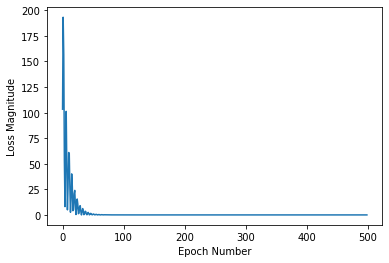

In [140]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

In [141]:
print(model.predict([100.0]))

[[62.137123]]


Kilometreyi Mile çevirmek istediğimizde mi =km * 0.62137 formülünü kullanıyoruz. 
Örneğin 100km * 0.62137 = 62.13712 mil'dir.


## Looking at the layer weights

Finally, let's print the internal variables of the Dense layer. 

In [128]:
print("These are the layer variables: {}".format(l0.get_weights()))

These are the layer variables: [array([[0.6213713]], dtype=float32), array([9.551171e-07], dtype=float32)]


The first variable is close to ~1.8 and the second to ~32. These values (1.8 and 32) are the actual variables in the real conversion formula.

This is really close to the values in the conversion formula. We'll explain this in an upcoming video where we show how a Dense layer works, but for a single neuron with a single input and a single output, the internal math looks the same as [the equation for a line](https://en.wikipedia.org/wiki/Linear_equation#Slope%E2%80%93intercept_form), $y = mx + b$, which has the same form as the conversion equation, $f = 1.8c + 32$.

Since the form is the same, the variables should converge on the standard values of 1.8 and 32, which is exactly what happened.

With additional neurons, additional inputs, and additional outputs, the formula becomes much more complex, but the idea is the same.

### A little experiment

Just for fun, what if we created more Dense layers with different units, which therefore also has more variables?

In [129]:
l0 = tf.keras.layers.Dense(units=4, input_shape=[1])
l1 = tf.keras.layers.Dense(units=4)
l2 = tf.keras.layers.Dense(units=1)
model = tf.keras.Sequential([l0, l1, l2])
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Finished training the model")
print(model.predict([100.0]))
print("Model predicts that 100 degrees Celsius is: {} degrees Fahrenheit".format(model.predict([100.0])))
print("These are the l0 variables: {}".format(l0.get_weights()))
print("These are the l1 variables: {}".format(l1.get_weights()))
print("These are the l2 variables: {}".format(l2.get_weights()))

Finished training the model
[[211.74744]]
Model predicts that 100 degrees Celsius is: [[211.74744]] degrees Fahrenheit
These are the l0 variables: [array([[-0.16633868, -0.5220555 ,  0.31271845, -0.611676  ]],
      dtype=float32), array([ 2.4976032, -3.0035985, -1.8228347, -3.1456428], dtype=float32)]
These are the l1 variables: [array([[-1.0366372 ,  0.18952715, -0.37756512, -0.7662511 ],
       [ 1.3404562 , -0.98082465,  0.40785402,  0.8591522 ],
       [ 1.0614778 , -0.16195758,  0.25556096,  0.39766598],
       [ 1.2671442 , -0.35716832,  0.88805103,  0.4048267 ]],
      dtype=float32), array([-3.1586156 ,  0.46824336, -2.3387742 , -2.486186  ], dtype=float32)]
These are the l2 variables: [array([[-1.1929663 ],
       [ 0.02680172],
       [-0.5225386 ],
       [-0.68029195]], dtype=float32), array([2.9205937], dtype=float32)]


As you can see, this model is also able to predict the corresponding Fahrenheit value really well. But when you look at the variables (weights) in the `l0` and `l1` layers, they are nothing even close to ~1.8 and ~32. The added complexity hides the "simple" form of the conversion equation.

Stay tuned for the upcoming video on how Dense layers work for the explanation.